# Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os
import pandas as pd
import time
import seaborn as sns

import sys, os, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
 
import seedlingTools as st

# Find Image Files

In [2]:
imageDirectory = "/media/jee/Shared Partition/camera"
print("Searching in :",imageDirectory)
imageList = []
for root, dirs, files in os.walk(imageDirectory, topdown=False):
    for name in files:
        if '.jpg' in name:
            imageList.append(os.path.join(root, name))
print('Found {} .jpg images.'.format(len(imageList)))
imageList.sort()

Searching in : /media/jee/Shared Partition/camera
Found 598 .jpg images.


# Split Image Files into Two Lists

In [3]:
# Two sample paths
print(imageList[0])
print(imageList[400])

/media/jee/Shared Partition/camera/lettuce1-bad-pH/2021-03-31_2200.jpg
/media/jee/Shared Partition/camera/pre-move/2021-04-17_1300.jpg


In [4]:
badPhList = [] # Images that were taken with bad pH
preMoveList = [] # Images that were taken before I moved in April 2021
for path in imageList:
    if 'bad' in path:
        badPhList.append(path)
    else:
        preMoveList.append(path)
        
print('Number of images in badPhList: {}'.format(len(badPhList)))
print('Number of images in preMoveList: {}'.format(len(preMoveList)))

Number of images in badPhList: 334
Number of images in preMoveList: 264


### Look at an Image

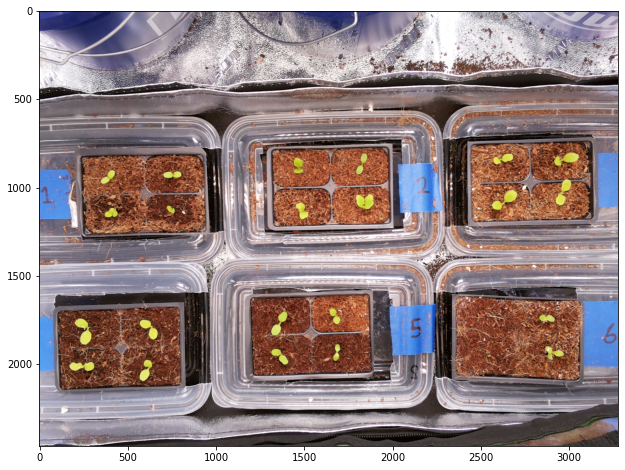

In [5]:
# Show an image form preMoveList
img = cv2.imread(preMoveList[215])
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,8))
plt.imshow(imgRGB)

## We are going to be plotting a lot of images...

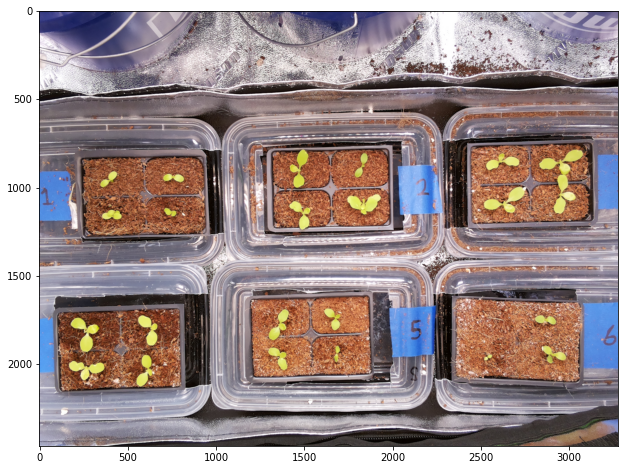

In [8]:
# Functionalize the plotting
def show_image_file(file):
    img = cv2.imread(file)
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15,8))
    plt.imshow(imgRGB)
    
def show_image(image, cmap = 'default'):
    plt.figure(figsize=(15,8))
    if cmap != 'default':
        plt.imshow(image, cmap = cmap)
    else:
        plt.imashow(image)
    
show_image_file(preMoveList[259])

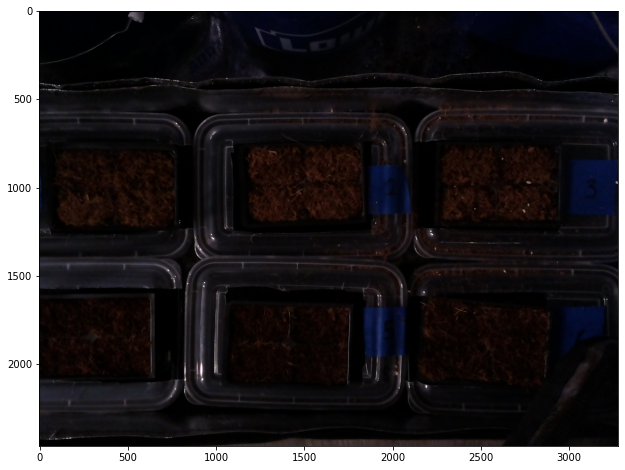

In [9]:
show_image_file(preMoveList[28])

# Look at Histograms

In [10]:
# Make a function that shows histograms
def plot_image_file_histogram(file):
    img = cv2.imread(file)
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        ax[1].plot(histr,color = col)
        ax[1].set_xlim([0,256])
    ax[1].grid()
    ax[1].set_xlabel("Color Value")
    ax[1].set_ylabel("Pixel Count")
    ax[0].imshow(imgRGB)
    
def plot_image_file_histogram_bgr(file):
    img = cv2.imread(file)
    imgHLS = cv2.cvtColor(img, cv2.COLOR_BGR2HLS_FULL)
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(2, 2, figsize=(15,10))
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        ax[1][1].plot(histr,color = col)
        ax[1][1].set_xlim([0,256])
    ax[1][1].grid()
    ax[1][1].set_xlabel("Color Value")
    ax[1][1].set_ylabel("Pixel Count")
    ax[1][1].legend(['Blue', 'Green', 'Red'])
    imgRed = imgRGB.copy()
    imgRed[:,:,1] = 0
    imgRed[:,:,2] = 0
    imgGreen = imgRGB.copy()
    imgGreen[:,:,0] = 0
    imgGreen[:,:,2] = 0
    imgBlue = imgRGB.copy()
    imgBlue[:,:,0] = 0
    imgBlue[:,:,1] = 0
    ax[0][0].imshow(imgBlue)
    ax[0][1].imshow(imgGreen)
    ax[1][0].imshow(imgRed)
    ax[0][0].set_title('Blue')
    ax[0][1].set_title('Green')
    ax[1][0].set_title('Red')
    plt.show()

# BRG Histogram

A feature vector (array) that contains information about the color values in an image. It represents the distribution of colors in the color space to be analyzed. 

<img src="notebook-images/grant-gray-hist.png"
     alt="Markdown Monster icon"
     style="width:800px;" />
     
     
In a BGR image (or any other) the channels can be displayed as gray scale images and they are added up to make a color image. This cube represents how different values can add up to  specific colors.
https://pyimagesearch.com/wp-content/uploads/2014/01/grant-gray-hist.png


<img src="notebook-images/RGB_color_solid_cube.png"
     alt="Markdown Monster icon"
     style="width:600px;" />
     
     
https://commons.wikimedia.org/wiki/File:RGB_color_solid_cube.png

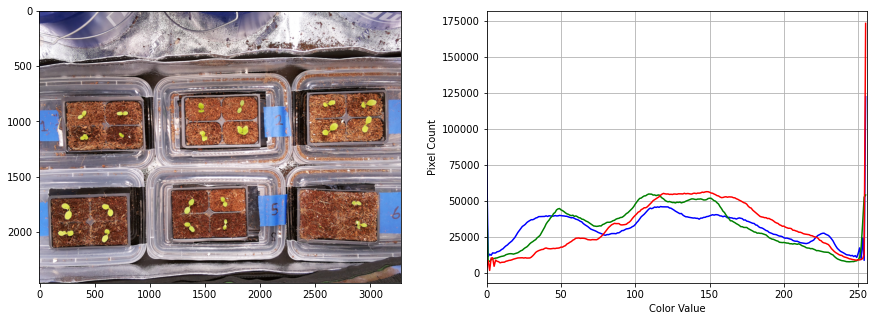

In [11]:
plot_image_file_histogram(preMoveList[215])

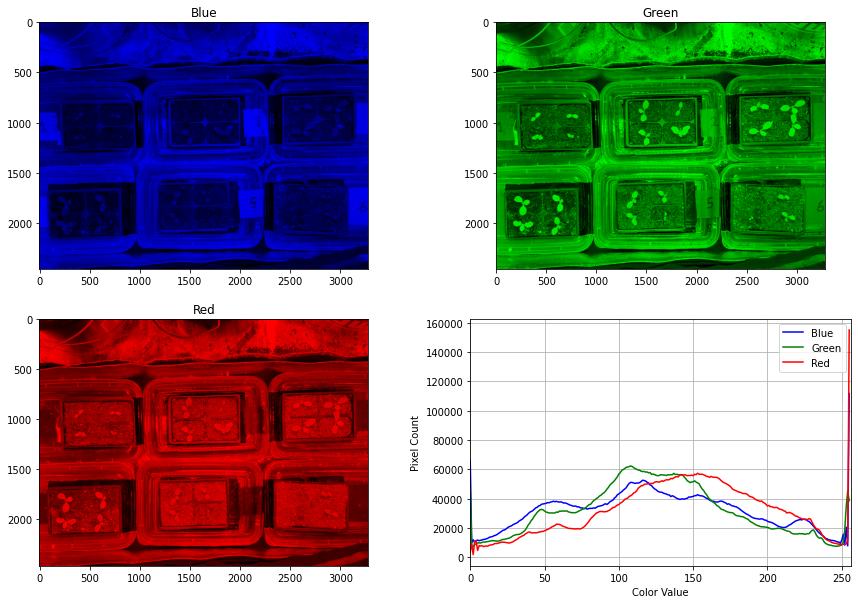

In [12]:
plot_image_file_histogram_bgr(preMoveList[259])

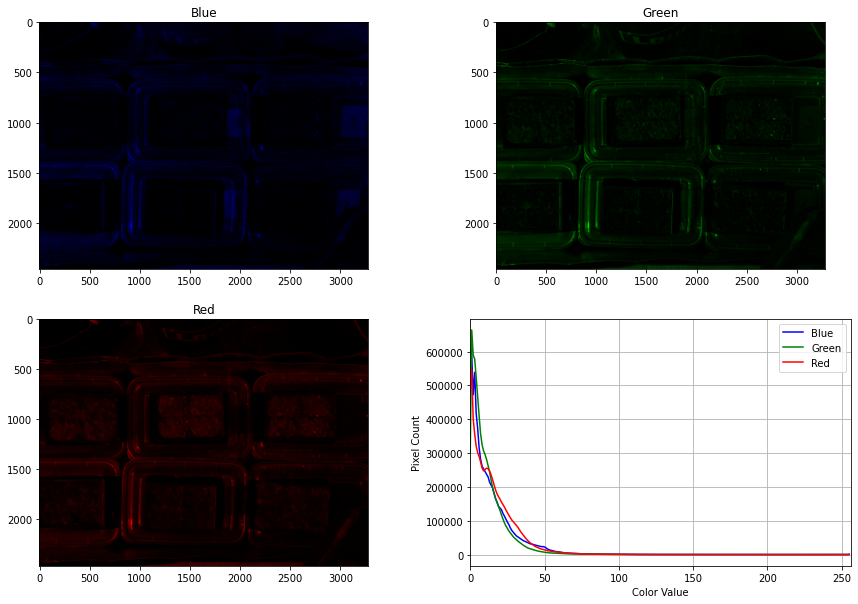

In [14]:
plot_image_file_histogram_bgr(preMoveList[28])

## HSL Colorspace
Like the BGR colorspace, the HSL colorspace is composed of three channels that can be viewed as grayscale images. I will used HLS and HSL interchangebly because opencv uses HSL.

<img src="notebook-images/HSL_color_solid_cylinder_saturation_gray.png"
     alt="Markdown Monster icon"
     style="width:400px;" />

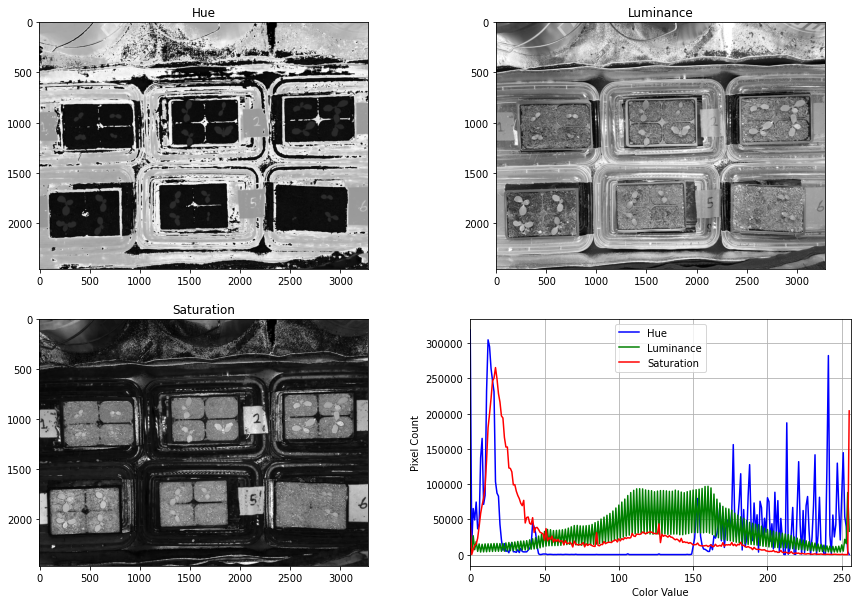

In [15]:
# Look at the images in HLS space
def plot_image_file_histogram_hls(file):
    img = cv2.imread(file)
    imgHLS = cv2.cvtColor(img, cv2.COLOR_BGR2HLS_FULL)
    fig, ax = plt.subplots(2, 2, figsize=(15,10))
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([imgHLS],[i],None,[256],[0,256])
        ax[1][1].plot(histr,color = col)
        ax[1][1].set_xlim([0,256])
    ax[1][1].grid()
    ax[1][1].set_xlabel("Color Value")
    ax[1][1].set_ylabel("Pixel Count")
    ax[1][1].legend(['Hue', 'Luminance', 'Saturation'])
    ax[0][0].imshow(imgHLS[:,:,0], cmap='gray')
    ax[0][1].imshow(imgHLS[:,:,1], cmap='gray')
    ax[1][0].imshow(imgHLS[:,:,2], cmap='gray')
    ax[0][0].set_title('Hue')
    ax[0][1].set_title('Luminance')
    ax[1][0].set_title('Saturation')
plot_image_file_histogram_hls(preMoveList[259])

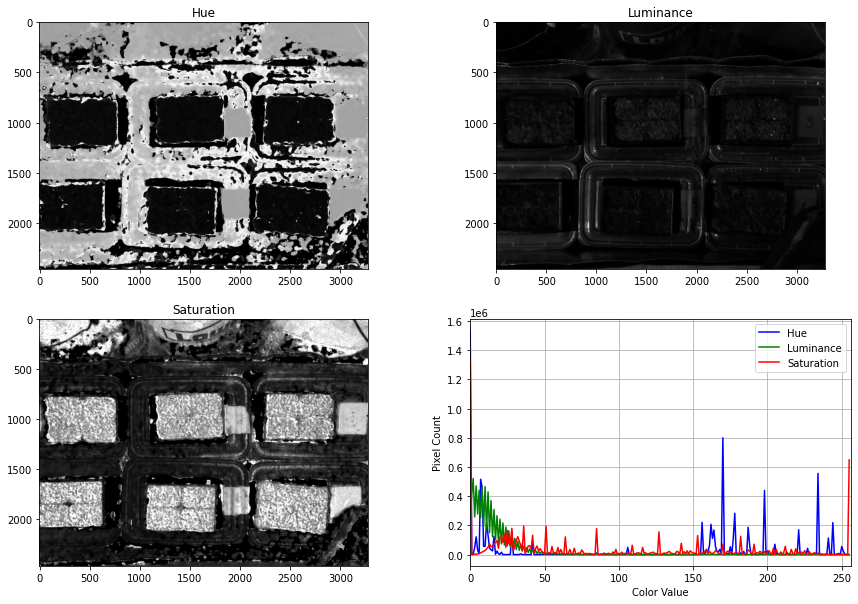

In [16]:
plot_image_file_histogram_hls(preMoveList[28])

# Create a Dataframe of all the Colors Averages

In [17]:
# Make a dataframe of all the average color values.
# This can be used to sort images
preMoveDict = {'file':[], 'saturationMean':[], 'luminanceMean':[], 'hueMean':[],
               'blueMean':[], 'greenMean':[], 'redMean':[]}
start = time.time()
for i, file in enumerate(preMoveList):
    elapsed = time.time() - start
    print("Processing Image {}/{} - Time Elapsed {} seconds".format(i, len(preMoveList), round(elapsed,2)), end='\r')
    preMoveDict['file'].append(file)
    img = cv2.imread(file)
    imgHLS = cv2.cvtColor(img, cv2.COLOR_BGR2HLS_FULL)
    preMoveDict['hueMean'].append(np.mean(imgHLS[:,:,0]))
    preMoveDict['luminanceMean'].append(np.mean(imgHLS[:,:,1]))
    preMoveDict['saturationMean'].append(np.mean(imgHLS[:,:,2]))
    preMoveDict['blueMean'].append(np.mean(img[:,:,0]))
    preMoveDict['greenMean'].append(np.mean(img[:,:,1]))
    preMoveDict['redMean'].append(np.mean(img[:,:,2]))

In [18]:
preMoveDf = pd.DataFrame(preMoveDict)
preMoveDf.head()

,file,saturationMean,luminanceMean,hueMean,blueMean,greenMean,redMean
0,/media/jee/Shared Partition/camera/pre-move/20...,68.579660,117.275029,118.094622,110.794862,108.386709,125.852382
1,/media/jee/Shared Partition/camera/pre-move/20...,64.539807,118.036268,130.116226,114.161195,109.156956,124.487011
2,/media/jee/Shared Partition/camera/pre-move/20...,66.225576,116.974241,131.260391,111.837732,107.286122,125.148766
3,/media/jee/Shared Partition/camera/pre-move/20...,76.930599,21.802709,115.192034,20.905158,18.212717,23.530508
4,/media/jee/Shared Partition/camera/pre-move/20...,31.414916,0.004705,10.643728,0.008438,0.118864,0.002453


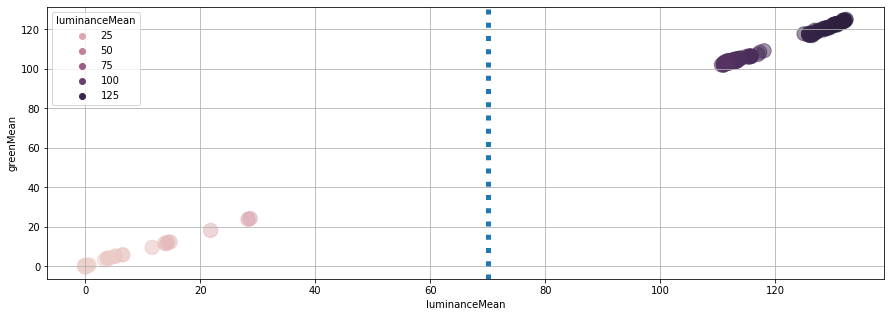

In [19]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='luminanceMean', y='greenMean', data=preMoveDf, s=200,
                hue='luminanceMean', alpha=0.5, edgecolor=None)
plt.axvline(70, linewidth=5, linestyle = ':')
plt.grid()

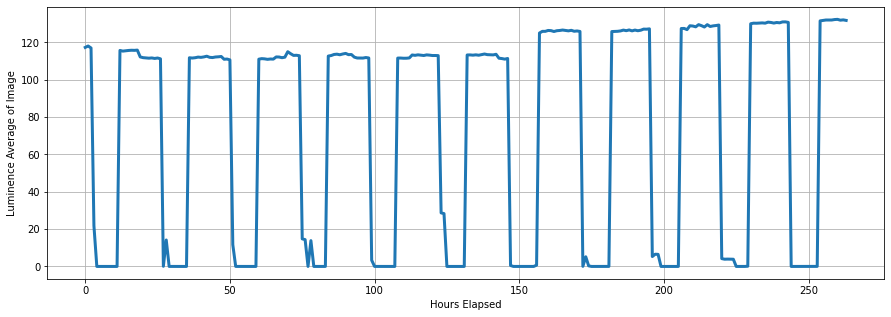

In [20]:
plt.figure(figsize=(15,5))
plt.plot(preMoveDf.index, preMoveDf['luminanceMean'], linewidth=3)
plt.xlabel("Hours Elapsed")
plt.ylabel("Luminence Average of Image")
plt.grid()

In [21]:
# Try to seperate files based on luminance mean
preMoveDf['goodImage'] = preMoveDf['luminanceMean']>70

In [22]:
preMoveDf.head()

,file,saturationMean,luminanceMean,hueMean,blueMean,greenMean,redMean,goodImage
0,/media/jee/Shared Partition/camera/pre-move/20...,68.579660,117.275029,118.094622,110.794862,108.386709,125.852382,True
1,/media/jee/Shared Partition/camera/pre-move/20...,64.539807,118.036268,130.116226,114.161195,109.156956,124.487011,True
2,/media/jee/Shared Partition/camera/pre-move/20...,66.225576,116.974241,131.260391,111.837732,107.286122,125.148766,True
3,/media/jee/Shared Partition/camera/pre-move/20...,76.930599,21.802709,115.192034,20.905158,18.212717,23.530508,False
4,/media/jee/Shared Partition/camera/pre-move/20...,31.414916,0.004705,10.643728,0.008438,0.118864,0.002453,False


In [24]:
try:
    os.makedirs(imageDirectory+'/pre-move/night')
    print("Created Directory: " + imageDirectory+'/pre-move/night')
except FileExistsError:
    print("Path already exsists: " + imageDirectory+'/pre-move/night')
try:
    os.makedirs(imageDirectory+'/pre-move/day')
    print("Created Directory: " + imageDirectory+'/pre-move/day')
except FileExistsError:
    print("Path already exsists: " + imageDirectory+'/pre-move/day')

Created Directory: /media/jee/Shared Partition/camera/pre-move/night
Created Directory: /media/jee/Shared Partition/camera/pre-move/day


In [25]:
for i in preMoveDf.index:
    file = preMoveDf['file'][i]
    splitPathList = file.split('/')
    if preMoveDf['goodImage'][i]:
        try:
            splitPathList[-2] = splitPathList[-2]+'/day'
            newPath = '/'.join(splitPathList)
            os.rename(file, newPath)
        except FileNotFoundError:
            print("File Not Found: " + file)

    else:
        try:
            splitPathList[-2] = splitPathList[-2]+'/night'
            newPath = '/'.join(splitPathList)
            os.rename(file, newPath)  
        except FileNotFoundError:
            print("File Not Found: " + file)

In [26]:
st.create_timelapse("/media/jee/Shared Partition/camera/pre-move/day",frameRate=20)

In [ ]:
def seperate_night_day(imageDirectory, threshold=70):
    imageList = []
    for root, dirs, files in os.walk(imageDirectory, topdown=False):
        for name in files:
            if '.jpg' in name:
                imageList.append(os.path.join(root, name))
    print('Found {} .jpg images.'.format(len(imageList)))
    imageList.sort()
    preMoveDict = {'file':[], 'saturationMean':[], 'luminanceMean':[], 'hueMean':[],
                   'blueMean':[], 'greenMean':[], 'redMean':[]}
    start = time.time()
    for i, file in enumerate(imageList):
        elapsed = time.time() - start
        print("Processing Image {}/{} - Time Elapsed {} seconds".format(i, len(imageList), round(elapsed,2)),
               end='\r')
        preMoveDict['file'].append(file)
        img = cv2.imread(file)
        imgHLS = cv2.cvtColor(img, cv2.COLOR_BGR2HLS_FULL)
        preMoveDict['hueMean'].append(np.mean(imgHLS[:,:,0]))
        preMoveDict['luminanceMean'].append(np.mean(imgHLS[:,:,1]))
        preMoveDict['saturationMean'].append(np.mean(imgHLS[:,:,2]))
        preMoveDict['blueMean'].append(np.mean(img[:,:,0]))
        preMoveDict['greenMean'].append(np.mean(img[:,:,1]))
        preMoveDict['redMean'].append(np.mean(img[:,:,2]))
    preMoveDf = pd.DataFrame(preMoveDict)
    preMoveDf['goodImage'] = preMoveDf['luminanceMean']>threshold
    try:
        os.makedirs(imageDirectory+'/night')
        print("Created Directory: " + imageDirectory+'/night')
    except FileExistsError:
        print("Path already exsists: " + imageDirectory+'/night')
    try:
        os.makedirs(imageDirectory+'/day')
        print("Created Directory: " + imageDirectory+'/day')
    except FileExistsError:
        print("Path already exsists: " + imageDirectory+'/day')

    for i in preMoveDf.index:
        file = preMoveDf['file'][i]
        splitPathList = file.split('/')
        if preMoveDf['goodImage'][i]:
            try:
                splitPathList[-2] = splitPathList[-2]+'/day'
                newPath = '/'.join(splitPathList)
                os.rename(file, newPath)
            except FileNotFoundError:
                print("File Not Found: " + file)

        else:
            try:
                splitPathList[-2] = splitPathList[-2]+'/night'
                newPath = '/'.join(splitPathList)
                os.rename(file, newPath)  
            except FileNotFoundError:
                print("File Not Found: " + file)

In [ ]:
seperate_night_day("/media/jee/Shared Partition/camera/lettuce1-bad-pH")

In [ ]:
st.create_timelapse("/media/jee/Shared Partition/camera/lettuce1-bad-pH/day",frameRate=10)